In [3]:
% matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import time

def rk4(f, x, h, *args):
    k_1 = f(x, *args) * h
    k_2 = f(x + 0.5 * k_1, *args) * h
    k_3 = f(x + 0.5 * k_2, *args) * h
    k_4 = f(x + k_3, *args) * h
    return x + (k_1 + 2. * (k_2 + k_3) + k_4) / 6.

def harmonic(x, w, w_0):
    return np.array([x[1], - w * w * x[0] / (w_0 * w_0)])

def takens(x, a, b, g):
    gg = g * g
    return np.array([
        x[1],
        a * gg + b * gg * x[0] - gg * x[0] * x[0] * x[0] - g * x[0] * x[0] * x[1] + gg * x[0] * x[0] - g * x[0] * x[1]
    ])

def takens_fast(x, a, b, g):
    gg = g * g
    return np.array([
        x[1],
        gg * (a + x[0] * (b + x[0] * (1. - x[0]))) - g * x[0] * x[1] * (x[0] + 1.)
    ])

def takens_dict(x, pars):
    #print pars
    g = pars['gamma']
    gg = g * g
    return np.array([
        x[1],
        gg * (pars['alpha'] + x[0] * (pars['beta'] + x[0] * (1. - x[0]))) - g * x[0] * x[1] * (x[0] + 1.)
    ])

class System(object):

    def __init__(self, vector_field, initial_cond,
                 t_0=0, field_pars=None, dt=1e-5, ode_func=rk4, sampling_rate=None):
        
        self.vector_field = vector_field
        self.field_pars = field_pars
        self.x = initial_cond
        self.t = t_0
        
        self.ode_func = ode_func
        self.dt = dt
        self.sampling_rate = np.int(0.1/dt) if sampling_rate is None else sampling_rate
        self.steps_per_sample = np.int(1/(self.sampling_rate*self.dt))
        
    def __iter__(self):
        return(self)
    
    def next(self):
        self.x = self.ode_func(self.vector_field, self.x, self.dt, self.field_pars)
        self.t = self.t + self.dt
        return self.x
    
    def integrate(self, t_f, t_0=None, x_0=None):
        # integrate over a period of time
        self.t = self.t if t_0 is None else t_0
        self.x = self.x if x_0 is None else x_0
        
        n_steps = np.int(np.round((t_f - self.t)/self.dt))
        n_samples = np.int(np.floor(n_steps/self.steps_per_sample))
        

        x = np.zeros([n_samples, self.x.shape[0]])
        x[:] = np.nan
        for i in range(n_steps):
            self.next()
            if not i%self.steps_per_sample:
                x[i / self.steps_per_sample, :] = self.x
        return x
    
# very basic example: harmonic oscillator
x = np.array([-0.5, 0.1])
a = -0.15
b = -0.298
g = 23500.

pars = {'alpha': a, 'beta': b, 'gamma': g}
s = System(takens_dict, np.array(x), field_pars=pars, dt=1. / (44100. * 5.), sampling_rate=44100)
takens_dict(x, pars)

array([1.00000000e-01, 2.06542088e+08])

In [8]:
# very basic example: harmonic oscillator
x = np.array([-0.5, 0.1])
a = -0.15
b = -0.298
g = 23500.

pars = {'alpha': a, 'beta':b, 'gamma':g}
times = np.zeros(100)

for i in range(times.shape[0]):
    s = System(takens_dict, np.array(x), field_pars = pars, dt=1./(44100.*1.), sampling_rate=44100)
    start = time.time()
    z = s.integrate(1)
    end = time.time()
    times[i] = end-start
    
#plt.plot(z[:,0], z[:,1])
#print np.mean(times)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

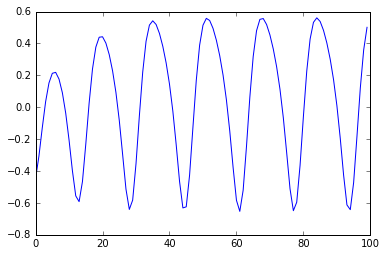

In [21]:
plt.plot(z[:100,0])

ValueError: x and y must have same first dimension

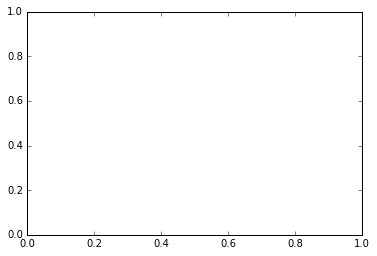

In [10]:
plt.plot(z[:, 0],times)dd

In [6]:
a=(36*2.5*2/25.)*1e09

In [8]:
1.1E-2

0.011